In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (30,30) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300 # Resolution dots per inches
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sales_data_with_discounts.csv")

In [ ]:
df


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
# Print the columns of the DataFrame
print(df.columns)

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
print(df['Discount Amount'].mode())

0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64


array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

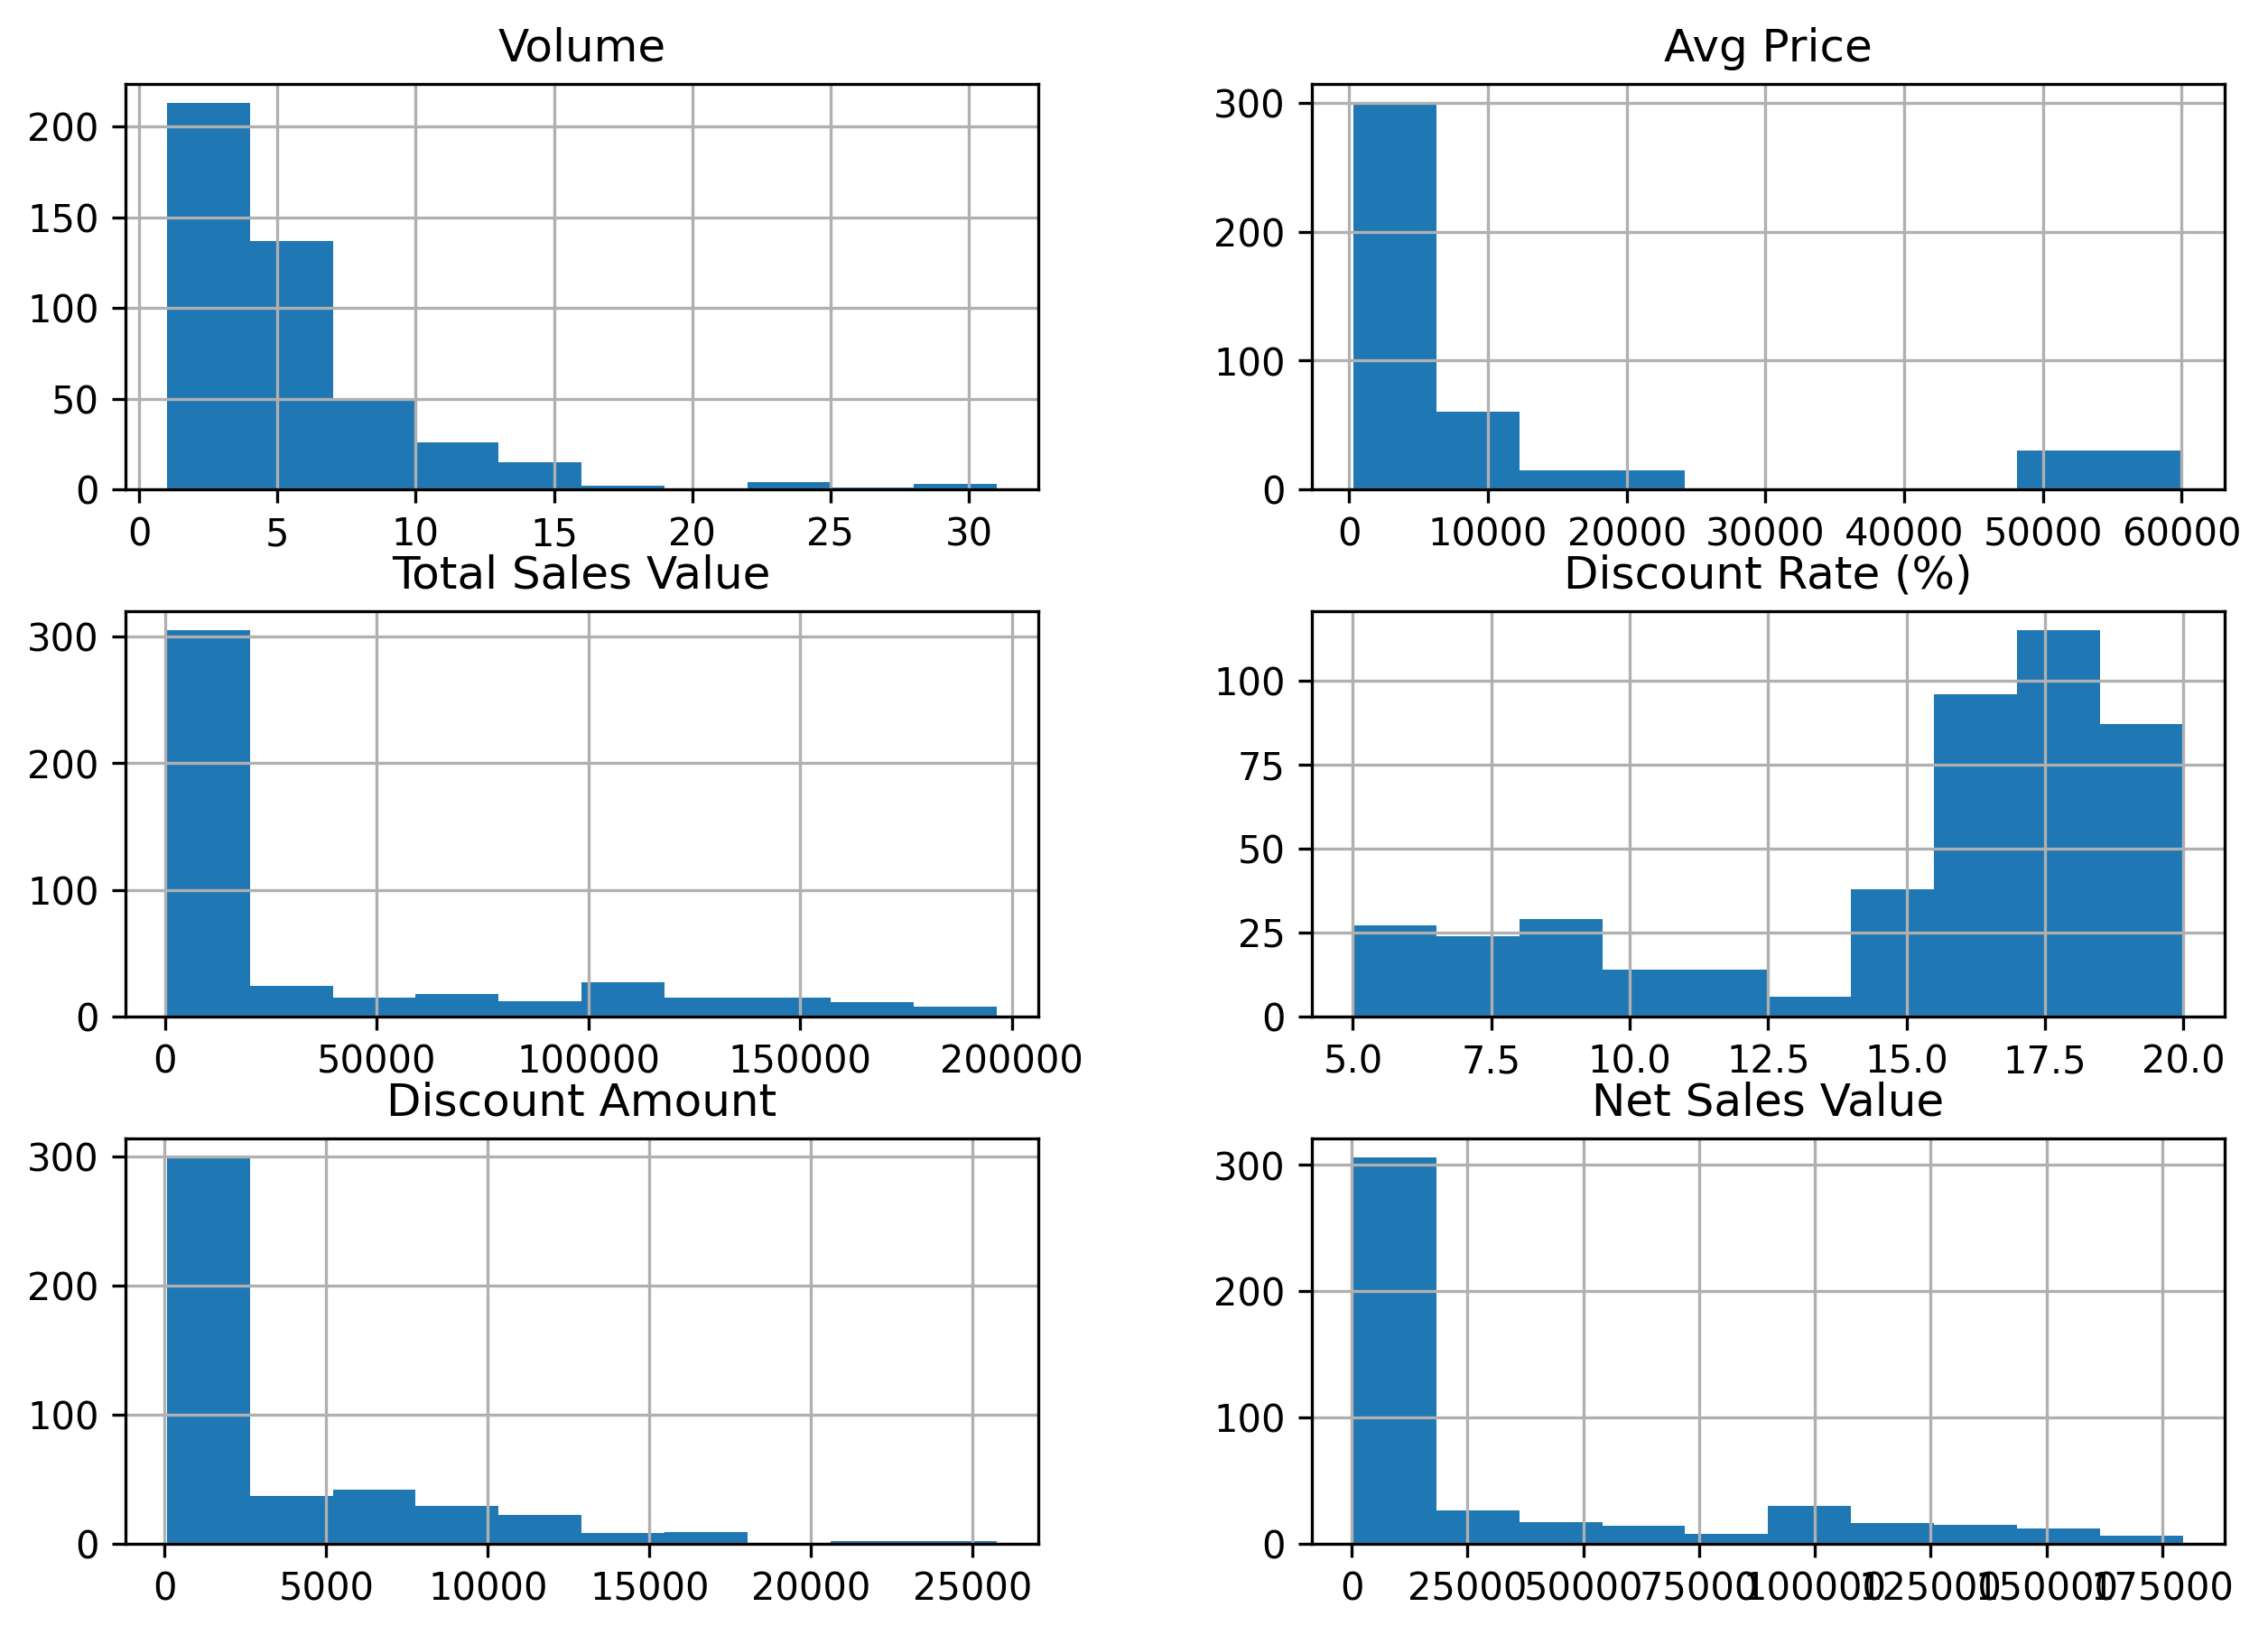

In [ ]:
df.hist()

<Axes: >

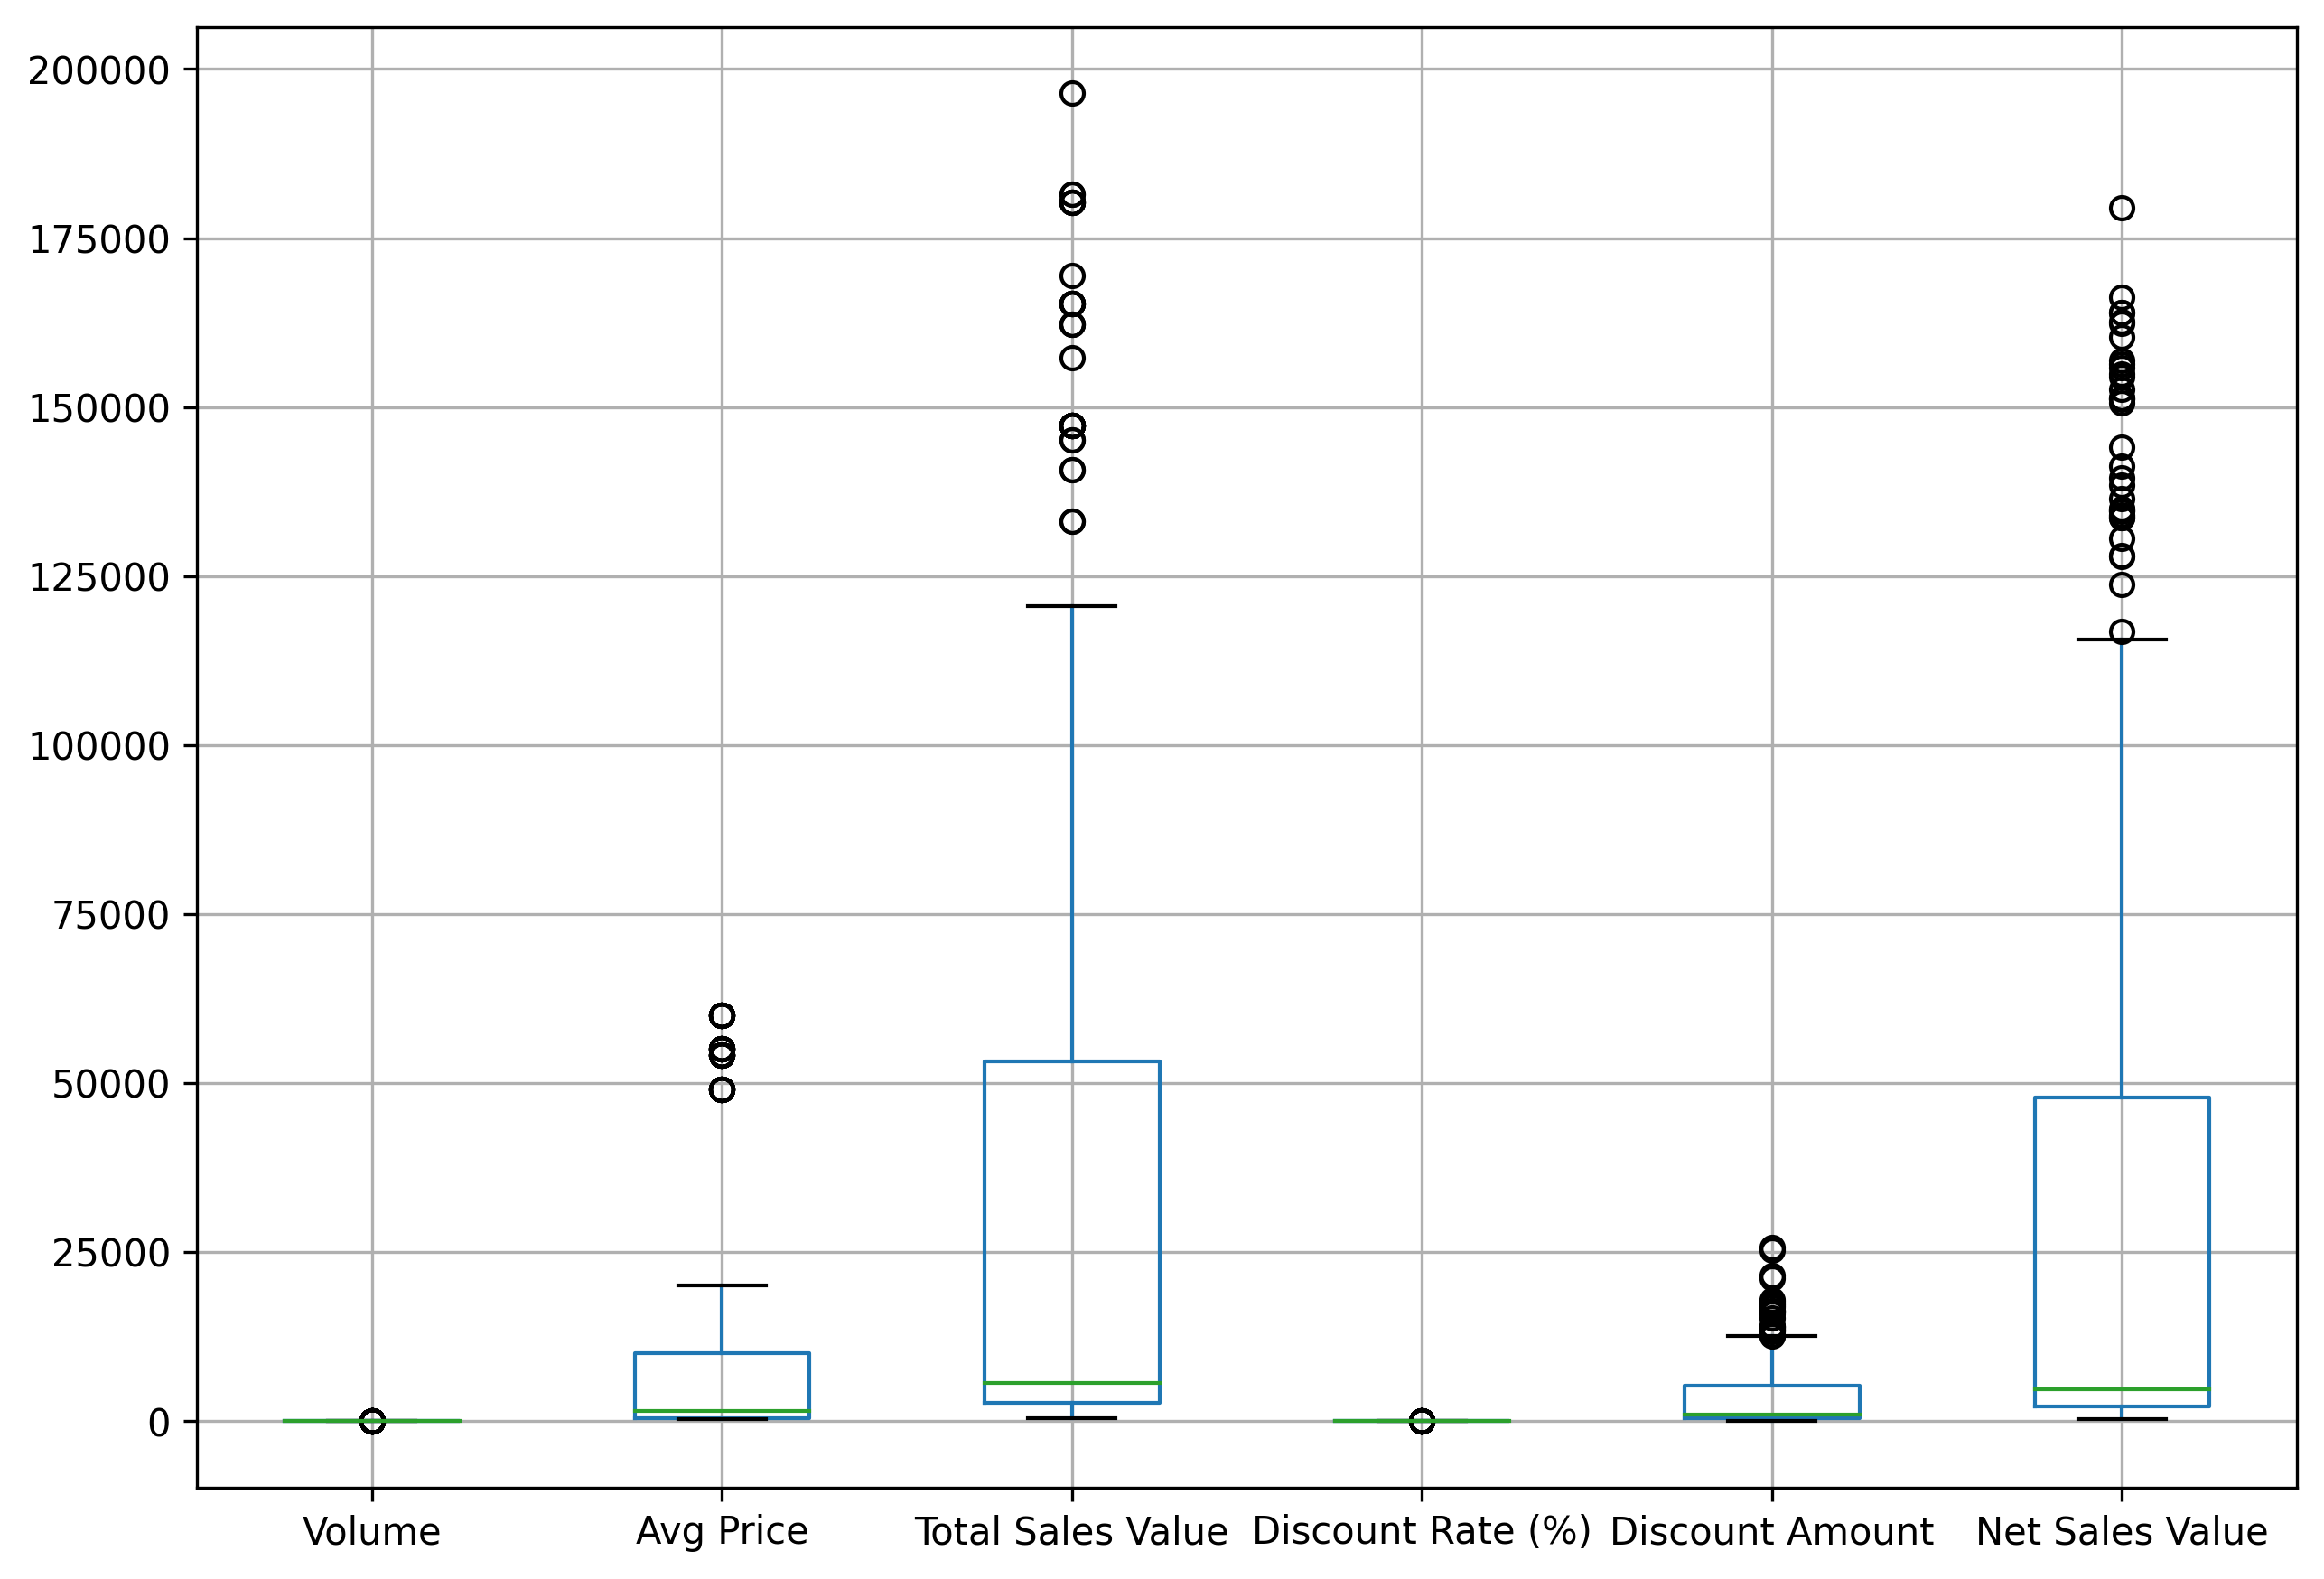

In [ ]:
df.boxplot()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
Labelencoder = preprocessing.LabelEncoder()

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoder.fit(df['Model'])

LabelEncoder()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['Model'] = encoder.transform(df['Model'])

In [ ]:
# Create a new dataframe without the label 'RU-10'
df_without_ru10 = df[df['Model'] != 'RU-10']

# Fit the encoder on the new dataframe
encoder.fit(df_without_ru10['Model'])

# Transform the 'Model' column in the new dataframe
df_without_ru10['Model'] = encoder.transform(df_without_ru10['Model'])

In [ ]:
# Replace the line causing the error with the following:
df['Day'].value_counts()

Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

In [ ]:
df['Day']

0      Thursday
1      Thursday
2      Thursday
3      Thursday
4      Thursday
         ...   
445    Thursday
446    Thursday
447    Thursday
448    Thursday
449    Thursday
Name: Day, Length: 450, dtype: object

In [ ]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,15,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,17,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,28,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,29,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,27,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,9,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,26,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,25,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,10,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
labels =('Day','SKU','BU','Brand','Model')

In [ ]:
index =(1)

In [ ]:
sizes = df['Day'].value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df.drop(columns=['City','Date'],inplace = True)

In [ ]:
df

In [ ]:
df.fit_transform(df)

In [ ]:
sc.fit_transform(df)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/sales_data_with_discounts.csv")

# Select categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Print the categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [ ]:
import matplotlib.pyplot as plt

# Iterate through each categorical column
for col in categorical_cols:
    # Count the frequency of each category
    value_counts = df[col].value_counts()

    # Create a bar chart
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Bar Chart for {col}")
    plt.show()

In [ ]:
# Print the frequency of each category for each column
for col in categorical_cols:
    print(f"\nFrequency of categories in '{col}':")
    print(df[col].value_counts())

# Analyze the distribution based on the bar charts and frequency tables
# Look for patterns, outliers, or interesting trends
# Draw conclusions and provide insights about the categorical data


Frequency of categories in 'Date':
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64

Frequency of categories in 'Day':
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Frequency of categories in 'SKU':
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64

Frequency of categories in 'City':
City
C    450
Name: count, dtype: int64

Frequency of categories in 'BU':
BU
Mobiles      150
FMCG  

In [ ]:
df


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
df1=df.drop(columns=['City','SKU','City','BU','Model','Brand','Day'])

In [ ]:
df1

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit_transform(df1)

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

In [ ]:
pd.DataFrame(sc.fit_transform(df1))

,0,1,2,3,4,5
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [ ]:
df1.columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
categorical_cols

In [ ]:
df = pd.get_dummies(data = df, columns =['Day', 'SKU', 'City', 'BU', 'Brand', 'Model'])

In [ ]:
df

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,15-04-2021,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,...,False,False,False,False,False,False,False,False,False,False
